In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [2]:
data = pd.read_csv("banque_data.csv")

In [3]:
data.tail()

,CDSEXE,MTREV,NBENF,CDSITFAM,CDTMT,CDMOTDEM,CDCATCL,AGEAD
45180,2,0,0,M,0,DV,21,32
45181,3,0,0,A,0,DV,21,36
45182,3,0,0,A,0,DA,21,32
45183,3,0,0,A,0,DV,21,31
45184,2,0,0,A,0,RA,21,40


label 1 pour désigner les clients encore, 0 pour désigner ceux qui ont dimissionné

In [4]:
data['CDMOTDEM'][45184] is np.nan

False

In [5]:
31154/14031

2.22036918252441

In [6]:
data['label'] = data['CDSEXE']
for i in range(len(data)):
    if data['CDMOTDEM'][i] is np.nan:
        data['label'][i] = 1
    else:
        data['label'][i] = 0

C:\Users\USER\AppData\Local\Temp\ipykernel_13472\2728074204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][i] = 1
C:\Users\USER\AppData\Local\Temp\ipykernel_13472\2728074204.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][i] = 0


In [7]:
data['label'].unique()

array([1, 0], dtype=int64)

In [8]:
len(data[data['label']==1])

14031

In [9]:
len(data[data['label']==0])

31154

<Axes: xlabel='label', ylabel='count'>

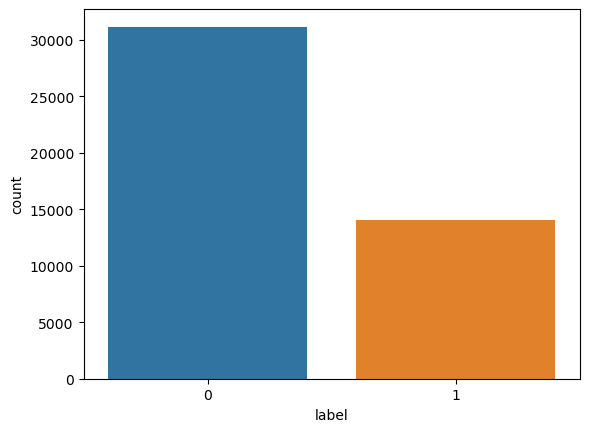

In [10]:
sns.countplot(x ='label', data = data)

In [11]:
data.head(3)

,CDSEXE,MTREV,NBENF,CDSITFAM,CDTMT,CDMOTDEM,CDCATCL,AGEAD,label
0,2,0,0,M,2,NaN,10,29,1
1,3,1524,0,M,2,NaN,10,29,1
2,2,0,0,A,0,DC,21,39,0


In [12]:
data.drop(["CDMOTDEM"],inplace = True, axis = 1)
data.head(3)

,CDSEXE,MTREV,NBENF,CDSITFAM,CDTMT,CDCATCL,AGEAD,label
0,2,0,0,M,2,10,29,1
1,3,1524,0,M,2,10,29,1
2,2,0,0,A,0,21,39,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45185 entries, 0 to 45184
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CDSEXE    45185 non-null  int64 
 1   MTREV     45185 non-null  int64 
 2   NBENF     45185 non-null  int64 
 3   CDSITFAM  45185 non-null  object
 4   CDTMT     45185 non-null  int64 
 5   CDCATCL   45185 non-null  int64 
 6   AGEAD     45185 non-null  int64 
 7   label     45185 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 2.8+ MB


In [14]:
categorical_columns = data.select_dtypes(include=['object'])
categorical_columns

,CDSITFAM
0,M
1,M
2,A
3,G
4,D
...,...
45180,M
45181,A
45182,A
45183,A


In [15]:
y = pd.get_dummies(categorical_columns, prefix='CDSITFAM')
y.head()

,CDSITFAM_A,CDSITFAM_B,CDSITFAM_C,CDSITFAM_D,CDSITFAM_E,CDSITFAM_F,CDSITFAM_G,CDSITFAM_M,CDSITFAM_P,CDSITFAM_S,CDSITFAM_U,CDSITFAM_V
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [16]:
result = pd.concat([data, y], axis=1, join='inner')
result = result.drop(['CDSITFAM'],axis = 1)
result.head()

,CDSEXE,MTREV,NBENF,CDTMT,CDCATCL,AGEAD,label,CDSITFAM_A,CDSITFAM_B,CDSITFAM_C,CDSITFAM_D,CDSITFAM_E,CDSITFAM_F,CDSITFAM_G,CDSITFAM_M,CDSITFAM_P,CDSITFAM_S,CDSITFAM_U,CDSITFAM_V
0,2,0,0,2,10,29,1,0,0,0,0,0,0,0,1,0,0,0,0
1,3,1524,0,2,10,29,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2,0,0,0,21,39,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2,1722,0,2,10,35,1,0,0,0,0,0,0,1,0,0,0,0,0
4,3,0,0,2,10,34,1,0,0,0,1,0,0,0,0,0,0,0,0


In [116]:
X = pd.DataFrame()
y = pd.DataFrame()
for item in result.columns:
    if item !="label":
        X[item] = result[item]
    else:
        y[item] = result[item]

In [117]:
y = y.to_numpy()
X = X.to_numpy()

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2, random_state=42, shuffle=True)

In [20]:

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5992  206]
 [ 455 2384]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6198
           1       0.92      0.84      0.88      2839

    accuracy                           0.93      9037
   macro avg       0.92      0.90      0.91      9037
weighted avg       0.93      0.93      0.93      9037



Ajoutons le paramètre "class_weight" pour prendre en considération le déséquilibrage des données.
Le mode "balanced" utilise les valeurs de y pour ajuster automatiquement les poids de manière inversement proportionnelle aux fréquences de classe dans les données d'entrée, selon la formule n_samples / (n_classes * np.bincount(y)).

In [23]:

clf = make_pipeline(StandardScaler(), SVC(gamma='auto', class_weight='balanced'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', gamma='auto'))])

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5967  231]
 [ 423 2416]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6198
           1       0.91      0.85      0.88      2839

    accuracy                           0.93      9037
   macro avg       0.92      0.91      0.91      9037
weighted avg       0.93      0.93      0.93      9037



In [27]:
help(SVC())

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)
# defining parameter range
param_grid = {'C': [0.1,], 
              'kernel': ['linear', 'poly', 'rbf'],
             'degree':[2,3,4,5]} 
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(Xs_train, y_train)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....C=0.1, degree=2, kernel=linear;, score=0.914 total time=  29.2s
[CV 2/5] END ....C=0.1, degree=2, kernel=linear;, score=0.913 total time=  29.1s
[CV 3/5] END ....C=0.1, degree=2, kernel=linear;, score=0.910 total time=  29.1s
[CV 4/5] END ....C=0.1, degree=2, kernel=linear;, score=0.913 total time=  29.3s
[CV 5/5] END ....C=0.1, degree=2, kernel=linear;, score=0.914 total time=  29.8s
[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.922 total time= 1.1min
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.920 total time=  46.7s
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.917 total time=  59.2s
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.917 total time= 1.1min
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.919 total time= 1.0min
[CV 1/5] END .......C=0.1, degree=2, kernel=rbf;, score=0.920 total time= 1.1min
[CV 2/5] END .......C=0.1, degree=2, kernel=rbf;

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1], 'degree': [2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [29]:
grid.best_params_

{'C': 0.1, 'degree': 3, 'kernel': 'poly'}

In [70]:
def print_metrics (y_test,y_pred):
    print("confusion_matrix : \n",confusion_matrix(y_test,y_pred))
    print("classification_report : \n",classification_report(y_test,y_pred))
    print("accuracy_score : ", accuracy_score(y_test,y_pred))


In [119]:
SVC = make_pipeline(StandardScaler(), SVC(gamma='auto', class_weight='balanced',C=0.1 ,kernel = 'poly', degree = 3))
SVC.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, class_weight='balanced', gamma='auto',
                     kernel='poly'))])

In [120]:
y_pred = SVC.predict(X_test)

In [121]:
print_metrics (y_test,y_pred)

confusion_matrix : 
 [[6034  164]
 [ 555 2284]]
classification_report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      6198
           1       0.93      0.80      0.86      2839

    accuracy                           0.92      9037
   macro avg       0.92      0.89      0.90      9037
weighted avg       0.92      0.92      0.92      9037

accuracy_score :  0.920438198517207


In [127]:
def SVC_classifier(X_train, y_train):
    SVC_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', class_weight='balanced'))
    SVC_clf.fit(X_train, y_train)
    return SVC_clf

In [123]:
def MLP_classifier(X_train, y_train):
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(16,8), max_iter=1000, random_state=42)
    mlp_classifier.fit(X_train, y_train)
    return mlp_classifier

In [124]:
def RF_classifier(X_train, y_train):
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    return rf_classifier

SVC

In [131]:
SVC_clf = SVC_classifier(X_train, y_train)


In [132]:
y_pred = SVC_clf.predict(X_test)

In [133]:
print_metrics(y_test,y_pred)

confusion_matrix : 
 [[5967  231]
 [ 423 2416]]
classification_report : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      6198
           1       0.91      0.85      0.88      2839

    accuracy                           0.93      9037
   macro avg       0.92      0.91      0.91      9037
weighted avg       0.93      0.93      0.93      9037

accuracy_score :  0.9276308509461104


MLP

In [134]:
MLP_clf = MLP_classifier(X_train, y_train)

In [135]:
y_pred = MLP_clf.predict(X_test)

In [136]:
print_metrics(y_test,y_pred)

confusion_matrix : 
 [[6025  173]
 [ 537 2302]]
classification_report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      6198
           1       0.93      0.81      0.87      2839

    accuracy                           0.92      9037
   macro avg       0.92      0.89      0.91      9037
weighted avg       0.92      0.92      0.92      9037

accuracy_score :  0.9214341042381321


Random Forest


In [137]:
RF_clf = RF_classifier(X_train, y_train)
y_pred = RF_clf.predict(X_test)
print_metrics(y_test,y_pred)

confusion_matrix : 
 [[5988  210]
 [ 375 2464]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6198
           1       0.92      0.87      0.89      2839

    accuracy                           0.94      9037
   macro avg       0.93      0.92      0.92      9037
weighted avg       0.93      0.94      0.93      9037

accuracy_score :  0.9352661281398694


# Equilibrage des données

In [138]:
#pip install d'abord imblearn pour manipuler les données non équilibrées

under sampling permet de réduire le nombre d'échantillons dans la classe sur-représentée (la classe avec plus d'instances) pour qu'il corresponde au nombre d'échantillons dans la classe sous-représentée (la classe avec moins d'instances).

# RandomUnderSampler

In [139]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [140]:
len(X_resampled),len(y_resampled)

(28062, 28062)

In [141]:
resmpled_df = pd.DataFrame(y_resampled, columns = ['y'])

In [142]:
resmpled_df.head()

,y
0,0
1,0
2,0
3,0
4,0


<Axes: xlabel='y', ylabel='count'>

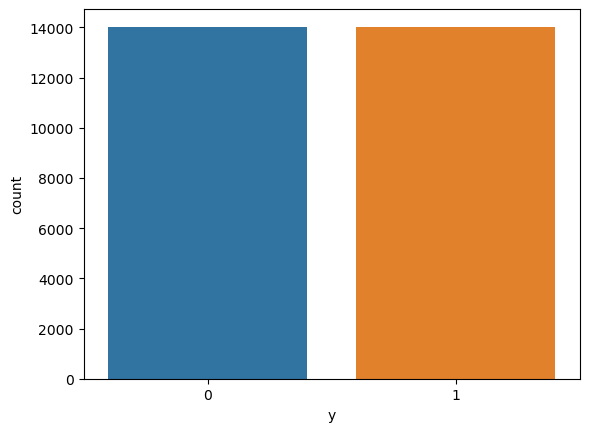

In [143]:
sns.countplot(x ='y', data = resmpled_df)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled.ravel(), test_size=0.2, random_state=42, shuffle=True)

SVC

In [145]:
SVC_clf = SVC_classifier(X_train, y_train)
y_pred = SVC_clf.predict(X_test)
print_metrics(y_test,y_pred)

confusion_matrix : 
 [[2700  125]
 [ 398 2390]]
classification_report : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      2825
           1       0.95      0.86      0.90      2788

    accuracy                           0.91      5613
   macro avg       0.91      0.91      0.91      5613
weighted avg       0.91      0.91      0.91      5613

accuracy_score :  0.9068234455727775


MLP

In [146]:
MLP_clf = MLP_classifier(X_train, y_train)
y_pred = MLP_clf.predict(X_test)
print_metrics(y_test,y_pred)

confusion_matrix : 
 [[2655  170]
 [ 347 2441]]
classification_report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2825
           1       0.93      0.88      0.90      2788

    accuracy                           0.91      5613
   macro avg       0.91      0.91      0.91      5613
weighted avg       0.91      0.91      0.91      5613

accuracy_score :  0.9078923926598966


Random Forest

In [148]:
RF_clf = RF_classifier(X_train, y_train)
y_pred = RF_clf.predict(X_test)
print_metrics(y_test,y_pred)

confusion_matrix : 
 [[2651  174]
 [ 284 2504]]
classification_report : 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      2825
           1       0.94      0.90      0.92      2788

    accuracy                           0.92      5613
   macro avg       0.92      0.92      0.92      5613
weighted avg       0.92      0.92      0.92      5613

accuracy_score :  0.9184037056832354


# RandomOverSampler

In [149]:
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [150]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X, y)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0, 31154), (1, 31154)]


In [151]:
X_traino, X_testo, y_traino, y_testo = train_test_split(X_train_ros, y_train_ros.ravel(), test_size=0.2, random_state=42, shuffle=True)

In [152]:
len(X_testo)

12462

SVC

In [153]:
SVC_clf = SVC_classifier(X_traino, y_traino)
y_pred = SVC_clf.predict(X_testo)
print_metrics(y_testo,y_pred)

confusion_matrix : 
 [[6052  219]
 [ 938 5253]]
classification_report : 
               precision    recall  f1-score   support

           0       0.87      0.97      0.91      6271
           1       0.96      0.85      0.90      6191

    accuracy                           0.91     12462
   macro avg       0.91      0.91      0.91     12462
weighted avg       0.91      0.91      0.91     12462

accuracy_score :  0.907157759589151


MLP

In [154]:
MLP_clf = MLP_classifier(X_traino, y_traino)
y_pred = MLP_clf.predict(X_testo)
print_metrics(y_testo,y_pred)

confusion_matrix : 
 [[5925  346]
 [ 806 5385]]
classification_report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      6271
           1       0.94      0.87      0.90      6191

    accuracy                           0.91     12462
   macro avg       0.91      0.91      0.91     12462
weighted avg       0.91      0.91      0.91     12462

accuracy_score :  0.9075589792970631


RF

In [155]:
RF_clf = RF_classifier(X_traino, y_traino)
y_pred = RF_clf.predict(X_testo)
print_metrics(y_testo,y_pred)

confusion_matrix : 
 [[5967  304]
 [ 489 5702]]
classification_report : 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      6271
           1       0.95      0.92      0.93      6191

    accuracy                           0.94     12462
   macro avg       0.94      0.94      0.94     12462
weighted avg       0.94      0.94      0.94     12462

accuracy_score :  0.9363665543251485


# SMOTE

In [157]:
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 31154), (1, 31154)]


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled.ravel(), test_size=0.2, random_state=42, shuffle=True)

SVC

In [159]:
SVC_clf = SVC_classifier(X_train, y_train)
y_pred = SVC_clf.predict(X_test)
print_metrics(y_test,y_pred)

confusion_matrix : 
 [[6071  200]
 [ 775 5416]]
classification_report : 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      6271
           1       0.96      0.87      0.92      6191

    accuracy                           0.92     12462
   macro avg       0.93      0.92      0.92     12462
weighted avg       0.93      0.92      0.92     12462

accuracy_score :  0.9217621569571497


MLP

In [160]:
MLP_clf = MLP_classifier(X_train, y_train)
y_pred = MLP_clf.predict(X_test)
print_metrics(y_test,y_pred)

confusion_matrix : 
 [[6002  269]
 [ 698 5493]]
classification_report : 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      6271
           1       0.95      0.89      0.92      6191

    accuracy                           0.92     12462
   macro avg       0.92      0.92      0.92     12462
weighted avg       0.92      0.92      0.92     12462

accuracy_score :  0.922404108489809


Random Forest

In [162]:
RF_clf = RF_classifier(X_train, y_train)
y_pred = RF_clf.predict(X_test)
print_metrics(y_test,y_pred)

confusion_matrix : 
 [[5998  273]
 [ 543 5648]]
classification_report : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      6271
           1       0.95      0.91      0.93      6191

    accuracy                           0.93     12462
   macro avg       0.94      0.93      0.93     12462
weighted avg       0.94      0.93      0.93     12462

accuracy_score :  0.934520943668753
